In [1]:
import matplotlib.pyplot as plt
import numpy as np
import edl
import plotting

%matplotlib widget

Sweep from pH 2.00 to 6.00. Maximum relative residual: 3.01633e-05.


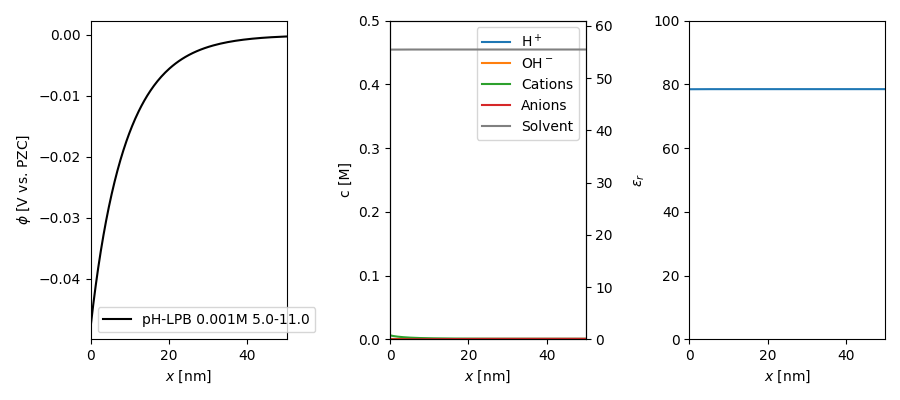

In [5]:
ph_range = np.linspace(-1, 10, 50)
chg = np.zeros(ph_range.shape)
support_conc = 1e-3

model = edl.ProtonLPB(support_conc, 5, 11, 60, 15)
ins_sol = model.spatial_profiles_ins(p_h=6)

xmin = -0.05
xmax = 50

fig, ax = plotting.plot_solution(ins_sol, xmin, xmax, logscale=False)
ax[1].set_ylim([0, 0.5])

plt.show()

In [ ]:
p_h = np.linspace(-1, 10, 50)
borukhov_sweep = potential_sweeps.ph_sweep(p_h, models.InsulatorBorukhov, (1e-2, 15e-10), force_recalculation=True)

In [ ]:
fig, ax = plt.subplots()

p_h = np.linspace(1, 10, 50)
borukhov_sweep_001 = potential_sweeps.ph_sweep(p_h, models.InsulatorBorukhov, (1e-3, 15e-10), force_recalculation=True)
borukhov_sweep_010 = potential_sweeps.ph_sweep(p_h, models.InsulatorBorukhov, (1e-2, 15e-10), force_recalculation=True)
borukhov_sweep_100 = potential_sweeps.ph_sweep(p_h, models.InsulatorBorukhov, (1e-1, 15e-10), force_recalculation=True)

ax.plot(p_h, -borukhov_sweep_001.charge * 1e6 * 1e-4, color='tab:purple', label='Borukhov 0.001 M')
ax.plot(p_h, -borukhov_sweep_010.charge * 1e6 * 1e-4, color='tab:red', label='Borukhov 0.01 M')
ax.plot(p_h, -borukhov_sweep_100.charge * 1e6 * 1e-4, color='tab:green', label='Borukhov 0.1 M')

ax.set_xlabel('pH')
ax.set_ylabel(r'$-\sigma$ [$\mu$C/cm$^2$]')
ax.legend()
ax.grid(True)

In [ ]:
fig, ax = plt.subplots()

ax.plot(p_h, borukhov_sweep.cap)
ax.set_ylim([0, 200])
ax.grid(True)

In [ ]:
fig, ax = plt.subplots(figsize=(4,5))

p_h = np.linspace(1, 5, 30)

borukhov_sweep_001 = potential_sweeps.ph_sweep(p_h, models.InsulatorBorukhov, (1e-2, 15e-10), force_recalculation=True)
borukhov_sweep_010 = potential_sweeps.ph_sweep(p_h, models.InsulatorBorukhov, (1e-1, 15e-10), force_recalculation=True)
borukhov_sweep_100 = potential_sweeps.ph_sweep(p_h, models.InsulatorBorukhov, (1, 15e-10), force_recalculation=True)

ax.plot(p_h, -borukhov_sweep_001.phi*1e3, color='tab:red', label='Borukhov 0.01M')
ax.plot(p_h, -borukhov_sweep_010.phi*1e3, color='tab:green', label='Borukhov 0.1M')
ax.plot(p_h, -borukhov_sweep_100.phi*1e3, color='tab:blue', label='Borukhov 1M')

ax.set_ylim([-20, 60])
ax.set_xlim([1, 5])
ax.set_xlabel('pH')
ax.set_ylabel(r'$\phi_0$ vs. PZC [mV]')
ax.grid(True)
ax.legend()
plt.tight_layout()